In [1]:
import numpy as np
import matplotlib.pyplot as plt
from definition import *
from astropy.table import Table

In [32]:
%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}
</style>
table.Conf(default_notebook_table_class)

In [33]:
def Percentage(data,ref):
    return (data-ref)/ref *100
def dECF_Nh(t): #L'argument "t" doit correspondre a une valeur de la liste "T"
    Matrix=[]
    blaze=['0','18','19','20','21','22']
    tabletest=Table(names=('Nh','0','18','19','20','21','22'))
    for i in range(len(Nh)-1):
        sousliste=[]
        sousliste.append(blaze[i])
        for j in range(len(Nh)):
            if i>j:
                sousliste.append(np.nan)
                pass
            else:
                sousliste.append(Percent(float(ecf[i][T==t]),float(ecf[j][T==t])))
        Matrix.append(sousliste)
    for ligne in Matrix:
        tabletest.add_row(ligne)
    return tabletest

def dECF_T(nh):
    blaze=['0','18','19','20','21','22']
    index=blaze.index(str(nh))
    ECF=ecf[index]
    Matrix=[]
    blaze=['6','6.5','7','7.5','8']
    tabletest=Table(names=('T','6','6.5','7','7.5','8'))
    for i in range(len(blaze)-1):
        sousliste=[]
        sousliste.append(blaze[i])
        for j in range(len(blaze)):
            if i>j:
                sousliste.append(np.nan)
            else:
                sousliste.append(Percent(float(ECF[T==float(blaze[i])]),float(ECF[T==float(blaze[j])])))
        Matrix.append(sousliste)
    for ligne in Matrix:
        tabletest.add_row(ligne)
    return tabletest

# T1 varie, differents Nh

In [34]:
os.system("rm /home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt")
name="all"
flux_type="unabsorbed"
Nh = Nh=[0,1e18,1e19,1e20,1e21,1e22]  # nombre courbes  # température. le 0.01 en plus est pour forcer np.arange() a fonctioner correctement
T = np.array([round(x,2) for x in (np.arange(5.6, 8.51, 0.05))]) # température. le 0.01 en plus est pour forcer np.arange() a fonctioner correctement
if name=="Soft": band="0.2-2"
if name=="Hard": band="2-12"
if name=="all": band="0.2-12"
system="XMM"
filterr = 'Medium'  # filtre
cts = 1e-2  # nombre de photons par seconde

comp=2
T2=7
percent=1
energy=1.2
header=[comp,T2,percent,energy]

# Appel de la fonction run_pimms() pour générer les données
for i in range(len(Nh)):
    run_pimms(Nh[i], T, filterr, band, cts,flux_type,header)

# Lecture des données dans le fichier all.txt
f = open("/home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt","r")
liste = f.readlines()
f.close()

# Calcul de l'ECF
count = cts
ecf = []
for i in range(len(liste)):
    temp = count / np.array([float(y) for y in liste[i].split()])
    ecf.append(temp / (10**11))

#Condition speciale pour la bande Hard
if len(T) != len(ecf[0]):
    T=list(T)
    T.pop(0)
    T=np.array(T)



Input created
Ouput readable
Input created
Ouput readable
Input created
Ouput readable
Input created
Ouput readable
Input created
Ouput readable
Input created
Ouput readable


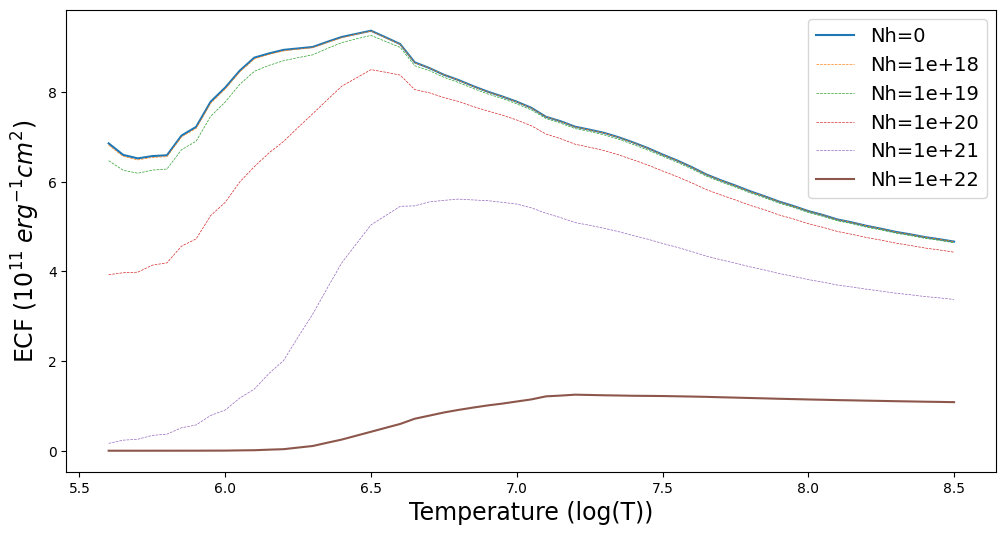

In [42]:
# Tracé du graphique
plt.figure(figsize=(12,6))
for i in range(len(Nh)):
    if i==0:
        plt.plot(T, ecf[i], label=f"Nh={Nh[i]}")
    elif i==(len(Nh)-1):
        plt.plot(T, ecf[i], label=f"Nh={Nh[i]}")
    else:
        plt.plot(T, ecf[i], label=f"Nh={Nh[i]}",linestyle='dashed',linewidth=0.5)

plt.legend(fontsize=14)
# plt.title(f"ECF=cts/Flux | cts={count} | band:{band}")
plt.xlabel("Temperature (log(T))"               ,fontsize=17)
plt.ylabel(r"ECF $(10^{11} \; erg^{-1} cm^{2})$",fontsize=17)
# plt.axhline(5,c='black',linestyle='dashed',linewidth=0.5)
# plt.axvline(6.36,c='black',linestyle='dashed',linewidth=0.5)
# plt.show()
plt.savefig(f"/home/thomas/Documents/0_Stage/My_pimms_prgm/Results/ECF_vs_T/ecf_vs_T_{system}_{name}_T2_{T2}.pdf",format='pdf')

## Nh fixe a 1.21*10^(21). 

# Je sais pus c'est quoi

Input created
Ouput readable


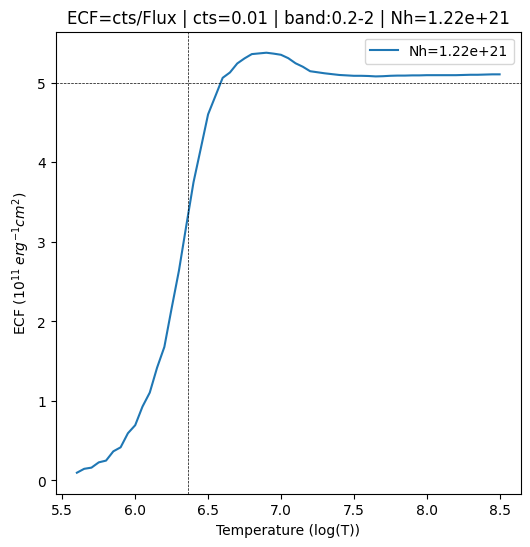

In [7]:
os.system("rm /home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt")
name="Soft"
flux_type="unabsorbed"
if name=="Soft": band="0.2-2"
if name=="Hard": band="2-12"
if name=="all": band="0.2-12"
Nh=[1.22*1e21]
T = np.array([round(x,2) for x in (np.arange(5.6, 8.51, 0.05))]) # température. le 0.01 en plus est pour forcer np.arange() a fonctioner correctement
comp=2
T2=7
percent=1
energy=1.2
header=[comp,T2,percent,energy]

run_pimms(Nh[0], T, filterr, band, cts,flux_type,header)

f = open("/home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt","r")
liste = f.readlines()
f.close()

# Calcul de l'ECF
count = cts
ecf = []
for i in range(len(liste)):
    temp = count / np.array([float(y) for y in liste[i].split()])
    ecf.append(temp / (10**11))
# Tracé du graphique
plt.figure(figsize=(6,6))
for i in range(len(Nh)):
    if i==0:
        plt.plot(T, ecf[i], label=f"Nh={Nh[i]}")
    elif i==(len(Nh)-1):
        plt.plot(T, ecf[i], label=f"Nh={Nh[i]}")
    else:
        plt.plot(T, ecf[i], label=f"Nh={Nh[i]}",linestyle='dashed',linewidth=0.5)

plt.legend()
plt.title(f"ECF=cts/Flux | cts={count} | band:{band} | Nh={Nh[0]}")
plt.xlabel("Temperature (log(T))")
plt.ylabel(r"ECF $(10^{11} \; erg^{-1} cm^{2})$")
plt.axhline(5,c='black',linestyle='dashed',linewidth=0.5)
plt.axvline(6.36,c='black',linestyle='dashed',linewidth=0.5)
plt.show()
#plt.savefig(f"/home/thomas/Documents/0_Stage/My_pimms_prgm/Results/ECF_vs_T/ecf_vs_T_{system}_{name}_T2_{T2}.pdf",format='pdf')

# T2 varie

T2 est une liste
Input created
Ouput readable


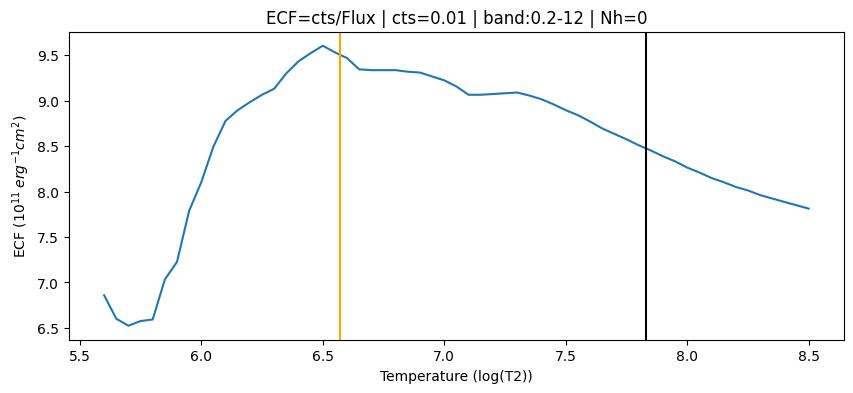

In [20]:
os.system("rm /home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt")

name="all"
flux_type="unabsorbed"
if name=="Soft": band="0.2-2"
if name=="Hard": band="2-12"
if name=="all": band="0.2-12"
percent=1
energy=1.2
filterr="Medium"

T1=[6.57]
T2 = np.array([round(x,2) for x in np.arange(5.6, 8.51, 0.05)])

ECF(Nh[0],T1,T2,filterr, band, cts,flux_type,percent,energy)

f = open("/home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt","r")
liste = f.readlines()
f.close()
#print(liste)
# Calcul de l'ECF
temp = count / np.array([float(y) for y in liste[0].split()])
ecf=temp / (10**11)
plt.figure(figsize=(10,4))
plt.plot(T2, ecf)
plt.title(f"ECF=cts/Flux | cts={count} | band:{band} | Nh={Nh[0]}")
plt.xlabel("Temperature (log(T2))")
plt.ylabel(r"ECF $(10^{11} \; erg^{-1} cm^{2})$")
plt.axvline(T1[0],c="orange")
plt.axvline(7.83,c='black')
#plt.show()
#plt.savefig(f"/home/thomas/Documents/0_Stage/My_pimms_prgm/Results/ECF_vs_T/ecf_vs_T_{system}_{name}_T2_{T2}.pdf",format='pdf')

#RAPPORT des deux ligne verticales

In [9]:
T = np.array([round(x,2) for x in (np.arange(5.6, 8.51, 0.05))]) # température. le 0.01 en plus est pour forcer np.arange() a fonctioner correctement
print(T)

[5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2  6.25
 6.3  6.35 6.4  6.45 6.5  6.55 6.6  6.65 6.7  6.75 6.8  6.85 6.9  6.95
 7.   7.05 7.1  7.15 7.2  7.25 7.3  7.35 7.4  7.45 7.5  7.55 7.6  7.65
 7.7  7.75 7.8  7.85 7.9  7.95 8.   8.05 8.1  8.15 8.2  8.25 8.3  8.35
 8.4  8.45 8.5 ]


In [10]:
n=7.83
sublist=[np.abs(t-n) for t in T]
index=sublist.index(np.min(sublist))
ref=ecf[index]

test=[]
Tsample=[6,6.5,7,7.5,8]
for t in Tsample:
    print(Percentage(ecf[T==t],ref)[0],"%")

-83.84937238493723 %
6.238532110091753 %
11.39971139971141 %
4.748982360922664 %
-1.988997037663966 %


# T1 varie

T1 est une liste
Input created
Ouput readable


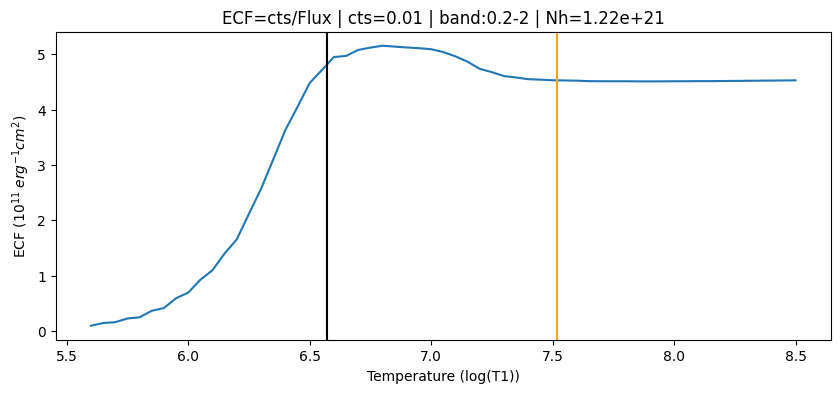

In [11]:
os.system("rm /home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt")

name="Soft"
flux_type="unabsorbed"
if name=="Soft": band="0.2-2"
if name=="Hard": band="2-12"
if name=="all": band="0.2-12"
percent=1
energy=1.2
cts=1e-2

T1=np.array([round(x,2) for x in np.arange(5.6, 8.51, 0.05)])
T2 = [7.52]

ECF(Nh[0],T1,T2,filterr, band, cts,flux_type,percent,energy)

f = open("/home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt","r")
liste = f.readlines()
f.close()

# Calcul de l'ECF


temp = cts / np.array([float(y) for y in liste[0].split()])
ecf=temp / (10**11)

# Tracé du graphique
plt.figure(figsize=(10,4))
plt.plot(T1, ecf)
plt.title(f"ECF=cts/Flux | cts={count} | band:{band} | Nh={Nh[0]}")
plt.xlabel("Temperature (log(T1))")
plt.ylabel(r"ECF $(10^{11} \; erg^{-1} cm^{2})$")
plt.axvline(6.57,c='black')
plt.axvline(T2[0],c='orange')
plt.show()
#plt.savefig(f"/home/thomas/Documents/0_Stage/My_pimms_prgm/Results/ECF_vs_T/ecf_vs_T_{system}_{name}_T2_{T2}.pdf",format='pdf')
plt.show()

In [12]:
n=6.57
sublist=[np.abs(t-n) for t in T]
index=sublist.index(np.min(sublist))
ref=ecf[index]

test=[]
Tsample=[6,6.5,7,7.5,8]
for t in Tsample:
    print("For T=",t,"We have a difference of",round(Percentage(ecf[T==t],ref)[0],0),"%","for Tref=",n )

For T= 6 We have a difference of -85.0 % for Tref= 6.57
For T= 6.5 We have a difference of -5.0 % for Tref= 6.57
For T= 7 We have a difference of 8.0 % for Tref= 6.57
For T= 7.5 We have a difference of -4.0 % for Tref= 6.57
For T= 8 We have a difference of -4.0 % for Tref= 6.57


# On fixe T1 et T2

In [21]:
os.system("rm /home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt")

name="all"
flux_type="unabsorbed"
filterr="Medium"
if name=="Soft": band="0.2-2"
if name=="Hard": band="2-12"
if name=="all": band="0.2-12"
percent=1
energy=1.2
cts=1e-2
Nh=[1.22*1e21]

T1 = [6.57]
T2 = [7.83]

ECF(Nh[0],T1,T2,filterr, band, cts,flux_type,percent,energy)

f = open("/home/thomas/Documents/0_Stage/My_pimms_prgm/all.txt","r")
liste = f.readlines()
f.close()

# Calcul de l'ECF
temp = cts / np.array([float(y) for y in liste[0].split()])
ecf=temp / (10**11)

print("ECF=",round(ecf[0],2),"pour la bande",name)

Input created
Ouput readable
ECF= 4.32 pour la bande all


In [22]:
sublist=list(np.abs(T-7.83))
index=sublist.index(np.min(sublist))

In [26]:
def Ttokev(T): #Comvert T to keV
    return T * 8.61733*10**(-8) #K*kev.K**-1

def kevtologT(E):
    return np.log10(E * 1/(8.61733*10**(-8)))

def TtologT(T):
    return np.log10(T)


In [19]:
T=69*10**6
print(Ttokev(T),"keV")
E=0.8
print(kevtologT(E),"K")
T=3.7*10**6
print(TtologT(T),"log(K)")

5.9459577 keV
6.967717262453608 K
6.568201724066995 log(K)
